In [79]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


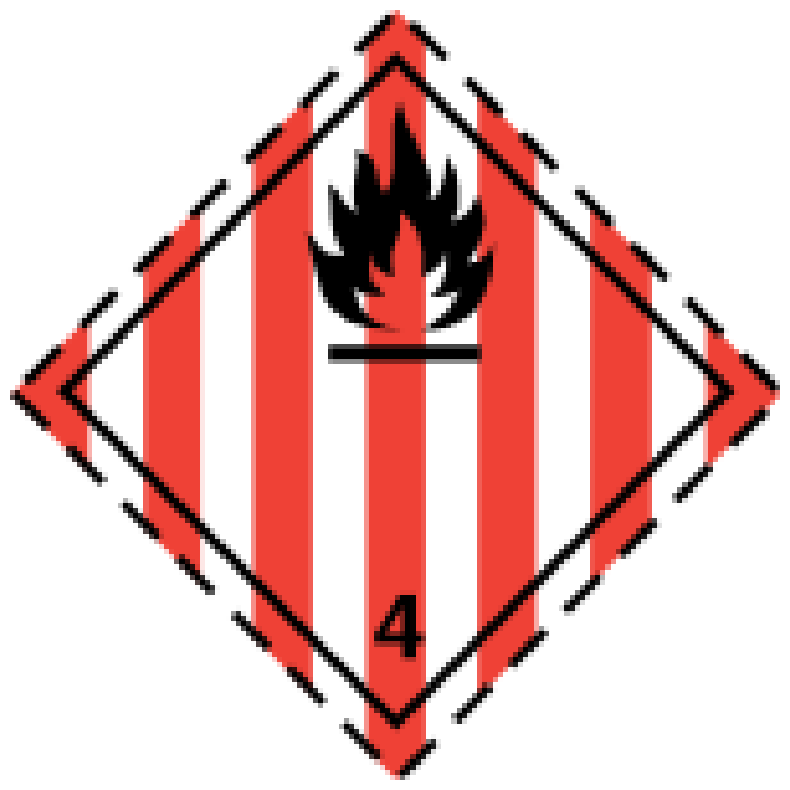

In [88]:
filename = "GHS_00000.png"
folder = "/Users/frbuccoliero/Desktop/Thesis/Tests/template_matching/dataset/templates/"

image = folder + filename
image = cv2.imread(image, cv2.IMREAD_UNCHANGED)
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# scale = 1
# image = cv2.resize(image, (int(image.shape[1] * scale), int(image.shape[0] * scale)))

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGBA))
plt.axis('off')
plt.show()

In [92]:
def SIFT_RGBH(image):
	
	# Handle 3 or 4 channel images
	if image.shape[2] == 4:
		bgr = image[:, :, :3]
		alpha = image[:, :, 3]
		# Create mask from alpha (non-transparent = 255)
		mask = cv2.threshold(alpha, 0, 255, cv2.THRESH_BINARY)[1]
	else:
		bgr = image
		# Full mask (everything visible)
		mask = np.ones(bgr.shape[:2], dtype=np.uint8) * 255

	# 3. Prepare individual channels
	R = bgr[:, :, 2]
	G = bgr[:, :, 1]
	B = bgr[:, :, 0]

	hsv = cv2.cvtColor(bgr, cv2.COLOR_BGR2HSV)
	H = hsv[:, :, 0]

	# 4. Initialize SIFT
	sift = cv2.SIFT_create()

	# 5. Detect keypoints on grayscale version, with mask
	gray = cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY)
	keypoints = sift.detect(gray, mask)

	# 6. Compute descriptors per channel at same keypoints
	_, des_r = sift.compute(R, keypoints)
	_, des_g = sift.compute(G, keypoints)
	_, des_b = sift.compute(B, keypoints)
	_, des_h = sift.compute(H, keypoints)

	# 7. Concatenate into 512D descriptor
	des_full = np.concatenate((des_r, des_g, des_b, des_h), axis=1)  # (N, 512)

	return keypoints, des_full

In [95]:
def load_images_from_folder(folder):
	images = []
	for filename in os.listdir(folder):
		if 'GHS' in filename and filename.endswith('.png'):
			img = cv2.imread(os.path.join(folder, filename), cv2.IMREAD_UNCHANGED)
			if img is not None:
				images.append(img)
	return images

imgs = load_images_from_folder(folder)

In [96]:
KP_DES = []

for img in imgs:
	kp, des = SIFT_RGBH(img)
	KP_DES.append((kp, des))

In [ ]:
all_descs = np.vstack([des for _, des in KP_DES])
pca = PCA(n_components=128)
pca.fit(all_descs)

PCA(n_components=128)